<a href="https://colab.research.google.com/github//pawel717-SCGE/lab1/blob/master/lab1-SCGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Generowanie danych o rozkładzie normalnym

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

mu = 1.0
sigma = 2.0
sample = np.random.normal(mu, sigma, 10000)

Wygenerowano próbkę z rozkładu normalnego o parametrach μ=1.0 i σ=2.0. Liczebność próbki wynosi 10000.

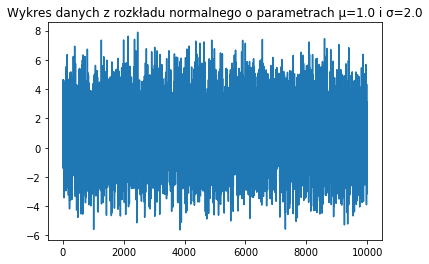

In [13]:
plt.title("Wykres danych z rozkładu normalnego o parametrach μ=1.0 i σ=2.0")
plt.plot(sample)

### Tworzenie histogramu

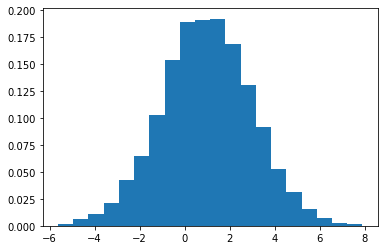

In [14]:
def plot_histogram(sample):
    count, bins, patches = plt.hist(sample, 20, density=True)

    # Plot the distribution curve
#     plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
#     plt.show()
    
plot_histogram(sample)

### Standaryzacja danych

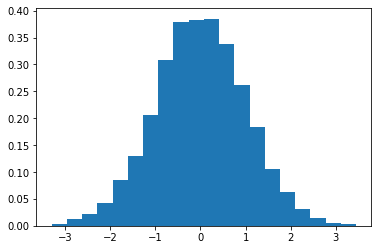

In [15]:
def standarize(sample):
    return (sample - sample.mean())/(sample.std())

sample_standarized = standarize(sample)
plot_histogram(sample_standarized)

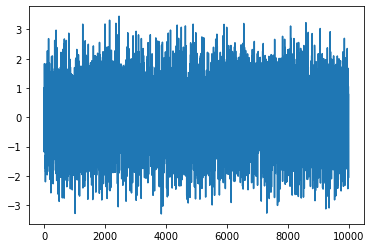

In [16]:
plt.plot(sample_standarized)

### Histogram w skali logarytmicznej

In [17]:
def plot_log_histogram(sample):
    plt.yscale('log', nonposy='clip')
    count, bins, patches = plt.hist(sample, 20, density=True)

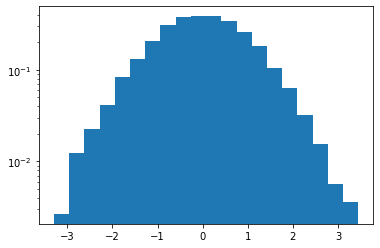

In [18]:
plot_log_histogram(sample_standarized)

 ### Dystrybuanta

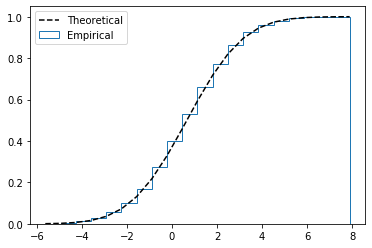

In [19]:
def plot_cumulative_distribution(sample, sigma, mu):
    count, bins, patches = plt.hist(sample, 20, density=True, cumulative=True,histtype='step', label='Empirical')
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    y = y.cumsum()
    y /= y[-1]
    plt.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
    plt.legend(loc='upper left')

plot_cumulative_distribution(sample, sigma=sigma, mu=mu)

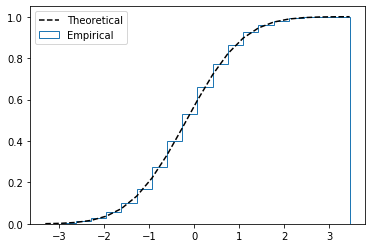

In [20]:
plot_cumulative_distribution(sample_standarized, sigma=1.0, mu=0)

Na wykresach wartości empiryczne dystrybuanty pokrywają się z teoretycznymi.

### Autokorelacja 

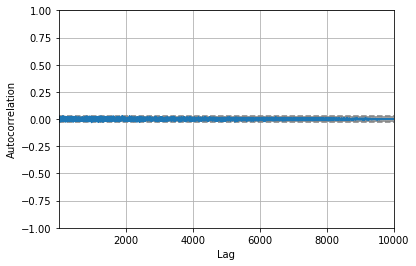

In [21]:
pd.plotting.autocorrelation_plot(sample_standarized)

Używamy wykresu autokorelacji, aby sprawdzić czy w próbce danych występują zależności między danymi dla różnych opóźnień czasowych.

Na wykresie wszystkie autokorelacje wynoszą 0, więc analizowany rozkład jest losowy, dane układają się w sposób przypadkowy.



## Dane Giełdowe

In [22]:
import pandas as pd
df_gspc = pd.read_csv('gspc.csv', index_col='Date')

In [23]:
df_gspc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2020-03-31,2614.689941,2641.389893,2571.149902,2584.590088,2584.590088,6568290000
2020-04-01,2498.080078,2522.750000,2447.489990,2470.500000,2470.500000,5947900000
2020-04-02,2458.540039,2533.219971,2455.790039,2526.899902,2526.899902,6454990000


In [24]:
df_gspc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000,2.317500e+04
mean,469.547606,472.290218,466.630556,469.646273,469.646273,7.433190e+08
std,695.249673,698.885847,691.282867,695.351962,695.351962,1.451354e+09
min,4.400000,4.400000,4.400000,4.400000,4.400000,0.000000e+00
25%,23.740000,23.740000,23.740000,23.740000,23.740000,1.240000e+06
50%,99.070000,99.839996,98.260002,99.070000,99.070000,1.684000e+07
75%,776.434998,786.259979,770.809998,777.839997,777.839997,4.915400e+08
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,1.145623e+10


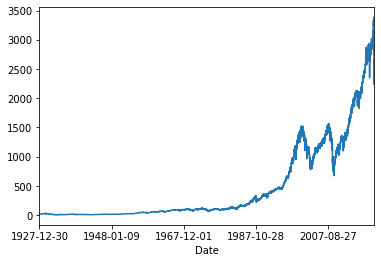

In [25]:
df_close = df_gspc['Adj Close']
df_close.plot()

Z wykresu wnioskujemy, że dane posiadają trend rosnący.

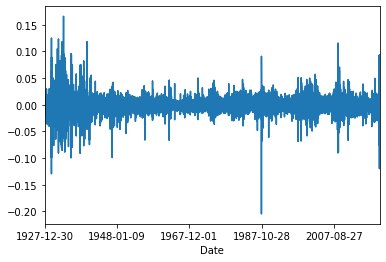

In [26]:
rets = df_close / df_close.shift(1) - 1
rets.plot(label='return')

In [27]:
df_change = pd.DataFrame(df_close).apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_change.describe()

,Adj Close
count,23174.000000
mean,0.000216
std,0.012006
min,-0.228997
25%,-0.004534
50%,0.000472
75%,0.005372
max,0.153661


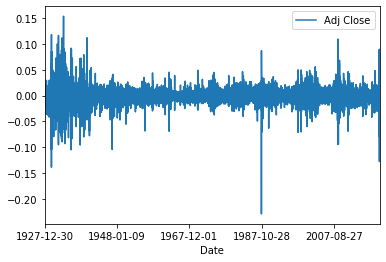

In [28]:
df_change.plot()

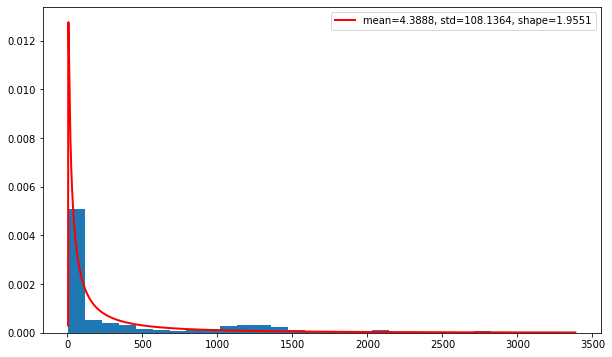

In [29]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))


shape, loc, scale = stats.lognorm.fit(df_close) 
x = np.linspace(df_close.min(), df_close.max(), len(df_close))
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

ax.hist(df_close, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

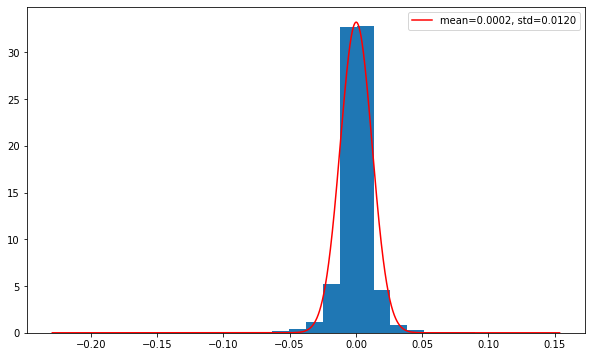

In [30]:
values = df_change['Adj Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

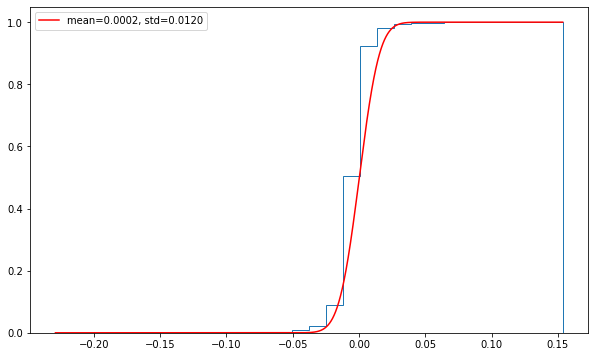

In [31]:
values = df_change['Adj Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True, cumulative=True, histtype='step')
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

### Autokorelacja

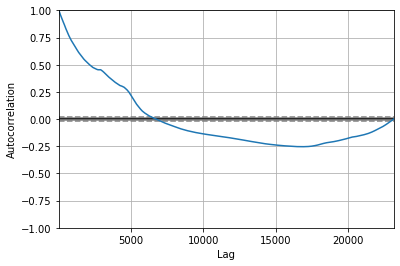

In [32]:
pd.plotting.autocorrelation_plot(df_close);

Z wykresu wynika, że dla danych giełdowych występują zależności. Najsilniejsze autokorelacje znajdują się na początku oraz w okolicy 15000.

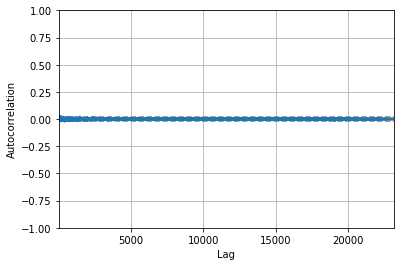

In [33]:
pd.plotting.autocorrelation_plot(rets[1:]);

Autokorelacje na wykresie wynoszą 0. W szeregu z wartościami zwrotu występuje losowość.

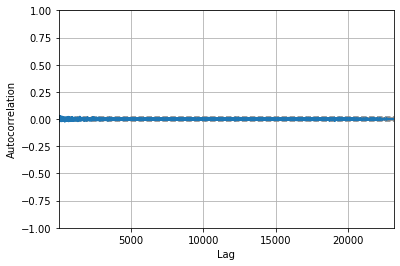

In [34]:
pd.plotting.autocorrelation_plot(df_change['Adj Close'][1:]);

Autokorelacje na wykresie wynoszą 0. Także w szeregu z wartościami logarytmicznymi zwrotu nie ma zależności.

# LAB 2
## Notowania kryptowalut

In [35]:
import pandas as pd
df_btcusd = pd.read_csv('Bitfinex_BTCUSD_1h.csv', index_col='Date')

In [36]:
df_btcusd

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2020-04-01 11-AM,BTCUSD,6310.00,6310.1,6293.4,6294.10,23.41,147569.08
2020-04-01 10-AM,BTCUSD,6315.70,6340.2,6308.9,6310.00,66.12,418085.75
2020-04-01 09-AM,BTCUSD,6328.10,6334.2,6290.7,6315.70,351.88,2218333.79
2020-04-01 08-AM,BTCUSD,6344.49,6345.6,6305.1,6328.10,117.64,743604.16
2020-04-01 07-AM,BTCUSD,6318.20,6355.9,6308.5,6344.49,95.89,607652.91
...,...,...,...,...,...,...,...
2017-10-09 01-PM,BTCUSD,4595.50,4621.0,4585.1,4617.20,1196.97,5515389.68
2017-10-09 12-PM,BTCUSD,4603.00,4610.0,4585.0,4595.50,570.88,2625211.20
2017-10-09 11-AM,BTCUSD,4594.90,4618.0,4594.9,4603.00,738.14,3401164.60


In [37]:
df_btcusd.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,21723.000000,21723.000000,21723.000000,21723.000000,21723.000000,2.172300e+04
mean,7768.209977,7815.329199,7718.149434,7768.298101,979.277916,8.063218e+06
std,2711.718758,2743.949160,2675.555842,2711.680826,1439.434039,1.284417e+07
min,3229.800000,3247.100000,3215.200000,3229.800000,0.000000,0.000000e+00
25%,6260.750000,6295.000000,6231.350000,6261.150000,184.335000,1.251194e+06
50%,7526.200000,7560.500000,7489.200000,7526.200000,492.900000,3.340403e+06
75%,9310.720000,9353.950000,9265.900000,9310.720000,1196.930000,9.179411e+06
max,19796.000000,19891.000000,19684.000000,19796.000000,33263.450000,2.541797e+08


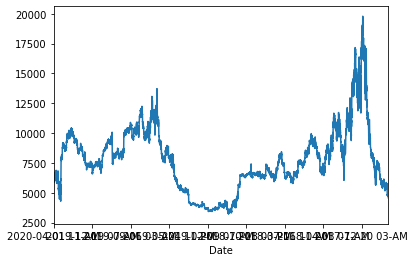

In [38]:
df_btcusd_close = df_btcusd['Close']
df_btcusd_close.plot()

Na wykresie znajduje się kilka lokalnych trendów.


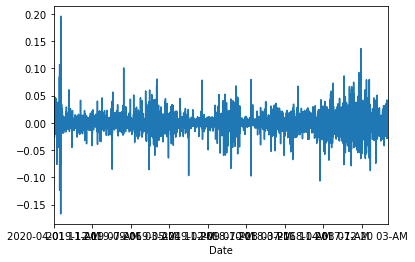

In [39]:
btdusd_rets = df_btcusd_close / df_btcusd_close.shift(1) - 1
btdusd_rets.plot(label='return')

In [40]:
df_btdusd_change = pd.DataFrame(df_btcusd_close).apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_btdusd_change.describe()

,Close
count,21722.000000
mean,-0.000015
std,0.009824
min,-0.182841
25%,-0.002930
50%,-0.000036
75%,0.002859
max,0.178806


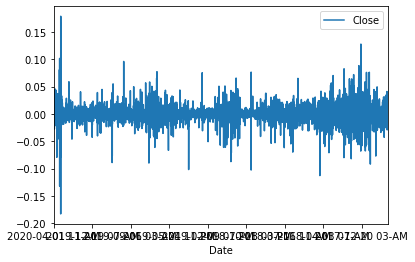

In [41]:
df_btdusd_change.plot()

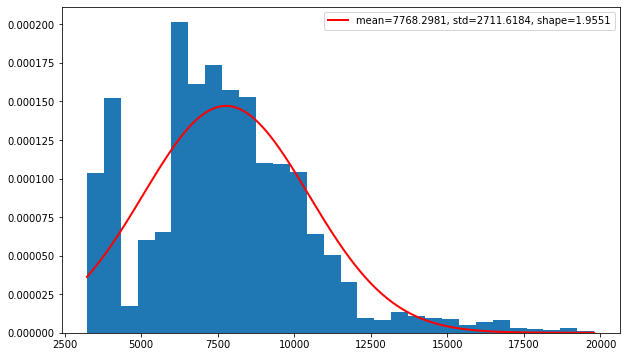

In [42]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))


loc, scale = stats.norm.fit(df_btcusd_close) 
x = np.linspace(df_btcusd_close.min(), df_btcusd_close.max(), len(df_btcusd_close))
pdf = stats.norm.pdf(x, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

ax.hist(df_btcusd_close, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

Prawa strona histogramu częściowo układa się w sposób zbliżony do rozkładu normalnego, jego lewa strona zupełnie od niego odbiega, występują maksima wykraczające poza rozkład normalny.

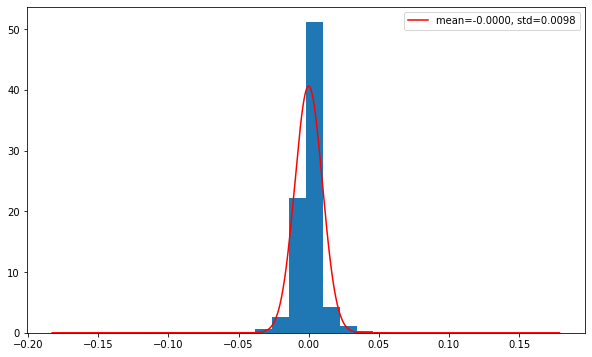

In [43]:
values = df_btdusd_change['Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

Histogram jest zbliżony do rozkładu normalnego, jednak bardziej przechylony na prawo i wykraczający poza maksumum rozkładu.

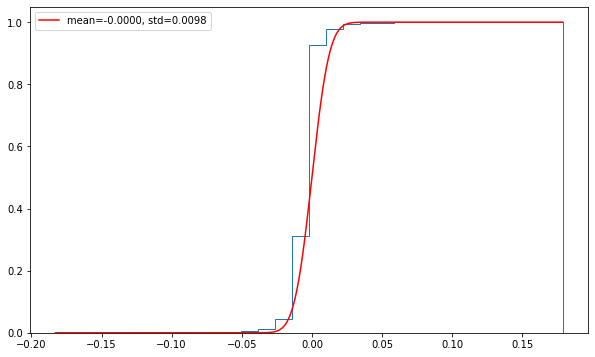

In [44]:
values = df_btdusd_change['Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True, cumulative=True, histtype='step')
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

Dystrybuanta empiryczna jest zbliżona do teoretycznej. W górnej części wykresu najbardziej od niej odbiega.

### Autokorelacja

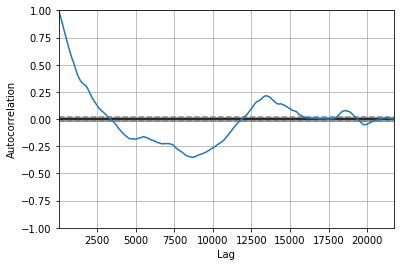

In [45]:
pd.plotting.autocorrelation_plot(df_btcusd['Close'])

Z wykresu autokorelacji wynika, że w szeregu występują zależności. 

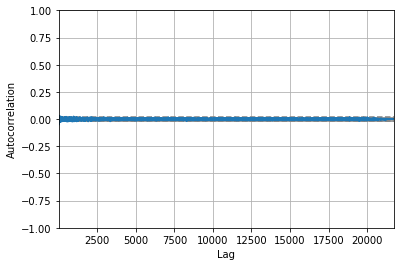

In [46]:
pd.plotting.autocorrelation_plot(df_btdusd_change['Close'][1:])

**Autokorelacja dla wymieszanych danych**

Mieszając dane w sposób losowy usuwamy korelację między danymi, dlatego w wyniku otrzymany wykres autokorelacji jest linią prostą y=0 (autokorelacja wynosi 0)

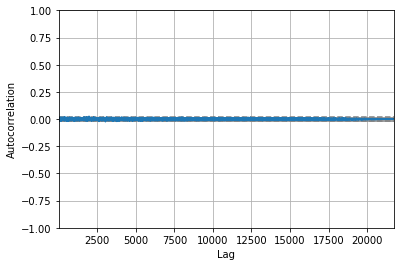

In [47]:
shuffled = sklearn.utils.shuffle(df_btcusd)
pd.plotting.autocorrelation_plot(shuffled['Close'])

# Data-puzzle

In [48]:
import pandas as pd
df_data_puzzle = pd.read_csv('data_puzzle.dat', header=None)

In [49]:
df_data_puzzle

,0
0,12.0
1,12.0
2,3.0
3,0.0
4,0.0
...,...
43490,19.0
43491,16.0
43492,13.0
43493,11.0


In [50]:
df_data_puzzle.describe()

,0
count,43495.000000
mean,86.540016
std,79.702157
min,0.000000
25%,21.000000
50%,65.000000
75%,135.000000
max,503.000000


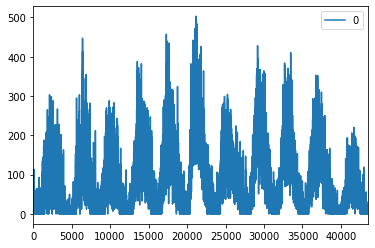

In [51]:
df_data_puzzle.plot()

Dane na wykresie przejawiają sezonowość.

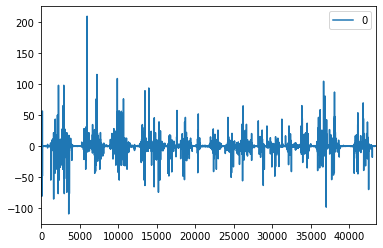

In [52]:
df_data_puzzle = standarize(df_data_puzzle)
data_puzzle_rets = df_data_puzzle / df_data_puzzle.shift(1) - 1
data_puzzle_rets.plot(label='return')

In [53]:
data_puzzle_rets.describe()

,0
count,43494.000000
mean,-0.022364
std,3.646787
min,-108.699455
25%,-0.183849
50%,0.000000
75%,0.149421
max,208.702954


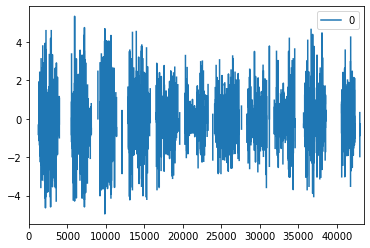

In [68]:
import numpy as np
df_data_puzzle_change = df_data_puzzle.apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_data_puzzle_change.plot(label='log return')

Na wykresie pojawiają się skupiska o podobnej szerokości.

In [69]:
df_data_puzzle_change.describe()

,0
count,16747.000000
mean,-0.003550
std,0.688160
min,-4.958003
25%,-0.228006
50%,0.000000
75%,0.221513
max,5.345692


In [70]:
y = data_puzzle_rets[0] - np.mean(data_puzzle_rets[0])
norm = np.sum(y ** 2)
correlated = np.correlate(y, y, mode='full')/norm

In [71]:
correlated

array([nan, nan, nan, ..., nan, nan, nan])

In [72]:
data_puzzle_rets[0]

0             NaN
1        0.000000
2        0.120741
3        0.035911
4        0.000000
           ...   
43490    0.115626
43491    0.044418
43492    0.042529
43493    0.027196
43494    0.145618
Name: 0, Length: 43495, dtype: float64

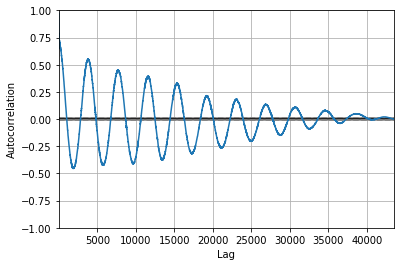

In [77]:
pd.plotting.autocorrelation_plot(df_data_puzzle[0])

W szeregu znajdują się zależności. Wykres autokorelacji jest podobny do wykresu drgań oscylatora harmonicznego tłumionego.

# LAB 4
## Transformata Fouriera i widmo mocy

https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/

In [78]:
import scipy as sp
import scipy.fftpack
data_puzzle_fft = sp.fftpack.fft(df_data_puzzle)

In [79]:
data_puzzle_psd = np.abs(data_puzzle_fft) ** 2

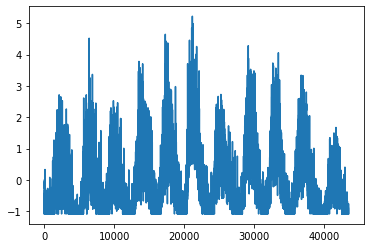

In [80]:
plt.plot(data_puzzle_fft)

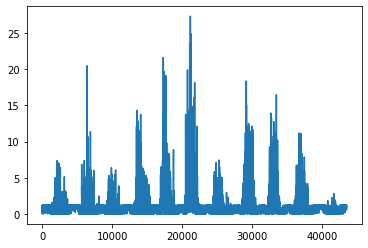

In [81]:
plt.plot(data_puzzle_psd)

# Algorytm MFDFA

In [62]:
X = df_btdusd_change

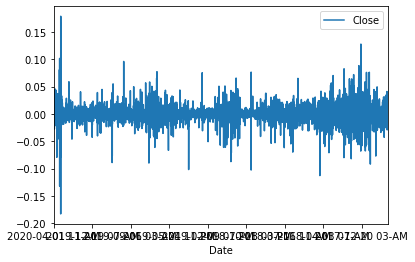

In [63]:
X.plot()

In [64]:
Y = X.cumsum()

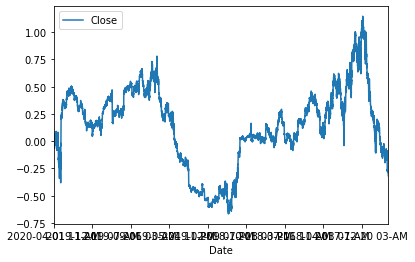

In [65]:
Y.plot()

In [66]:
def MFDFA(s, v):
    F2 = 1/s * ysum(s)
    Ns = int(N/s)
    Fq = 1/(2*Ns) * f2sum(Ns)

def f2sum(Ns):
    for v in range(1, 2*Ns+1):
        math.pow(x, q/2)
        
        
    
def ysum(s):
    sum = 0
    for i in range(1, s+1):
        index = (v - 1) * s + i
        summand = (Y[index] - yv[i]) ** 2
        sum += summand
        
    return sum
        

In [67]:
def MFDFA(timeseries: np.ndarray, lag: np.ndarray=None, order: int=1,
          q: np.ndarray=2, modified: bool=False) -> np.ndarray:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-67-c77e18ed58bc>, line 3)

In [84]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [86]:
import pylab as pl
import pandas as pd
import numpy as np
from MFDFA import MFDFA
from MFDFA import fgn
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fftpack import fft
import seaborn as sns

In [87]:
plt.rcParams["figure.figsize"] = (16,8)
df_data_puzzle = pd.read_csv('data_puzzle.dat', header=None)

# def best_fit_slope(xs, ys):
#     m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) / 
#          ((np.mean(xs)**2) - np.mean(xs**2)))
#     return m

In [88]:
t_final = 500
delta_t = 0.001

# Some drift thetea and difussion sigma parameters
theta = 0.3
sigma = 0.1

# The time array of the trajectory
time = np.arange(0, t_final, delta_t)

# The fractional Gaussian noise
H = 0.7
dB = (t_final ** H) * fgn(N = time.size, H = H)

# Initialise the array y
y = np.zeros([time.size])

# Integrate the process
for i in range(1, time.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dB[i]

MFDFA w skali log-log, wykłądni Hursta

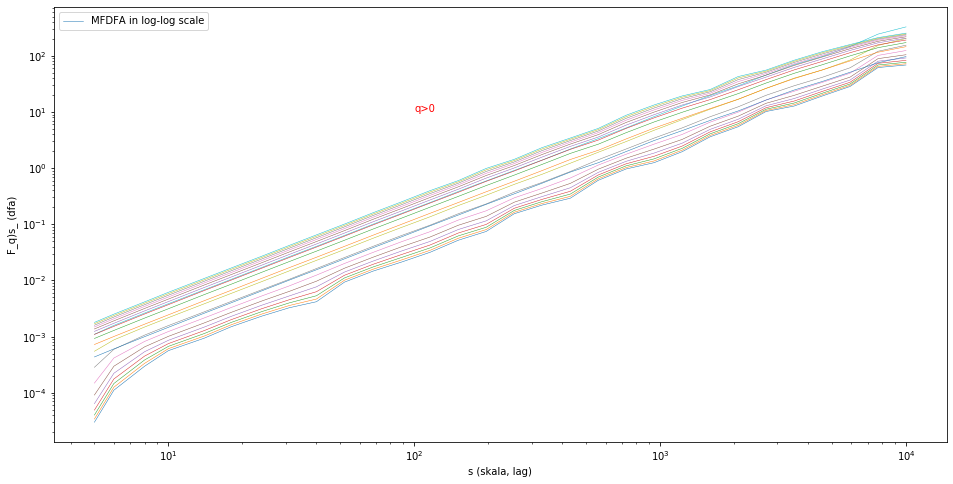

In [91]:
lag = np.logspace(0.7, 4, 30).astype(int)
# q = 5
order = 1 # stopień wielomianu do dopasowania

# lag, dfa = MFDFA(y, lag = lag, q = q, order = order)

# H(q) = slope (wspolczynnik kierunkowy / nachylenie)
# plt.plot(lag, dfa, 'o', label='f0U: MFDFA q=2')
# np.polyfit(lag[:15], dfa[:15], 1)[0]
# plt.show()
q_slopes = []
q_list = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for q in q_list:
    lag, dfa = MFDFA(y, lag = lag, q = q, order = order)
    plt.loglog(lag, dfa, '-', label='f0U: MFDFA q=2', linewidth = 0.5)
    np.polyfit(np.log(lag[:15]), np.log(dfa[:15]), 1)[0]
    
    xs = np.array(np.log(lag), dtype=np.float64)
    ys = np.array(np.log(dfa), dtype=np.float64)
#     slope = best_fit_slope(xs, ys)
    #    slope = best_fit_slope(log(xs), log(ys))
    slope = np.polyfit(xs, ys, 1,)[0][0]
    q_slopes.append(slope)

labels = ["MFDFA in log-log scale"]
plt.legend(labels)
plt.xlabel("s (skala, lag)")
plt.ylabel("F_q)s_ (dfa)")
plt.text(1e+2, 1e+1, 'q>0', color ='red')
plt.show()

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [1.7915432387369756, 1.7827057682154415, 1.7722672138731173, 1.7599440795802834, 1.745516183167277, 1.7289480459531719, 1.710540772395156, 1.6913792423380254, 1.675586476757097, 1.6644522988563786, 1.6447130376483876, 1.6364928197908029, 1.6298786964591176, 1.6246184320759662, 1.620370058997684, 1.616824588702617, 1.6137331819093106, 1.610923128637393, 1.6082925188872315, 1.605789226722931]


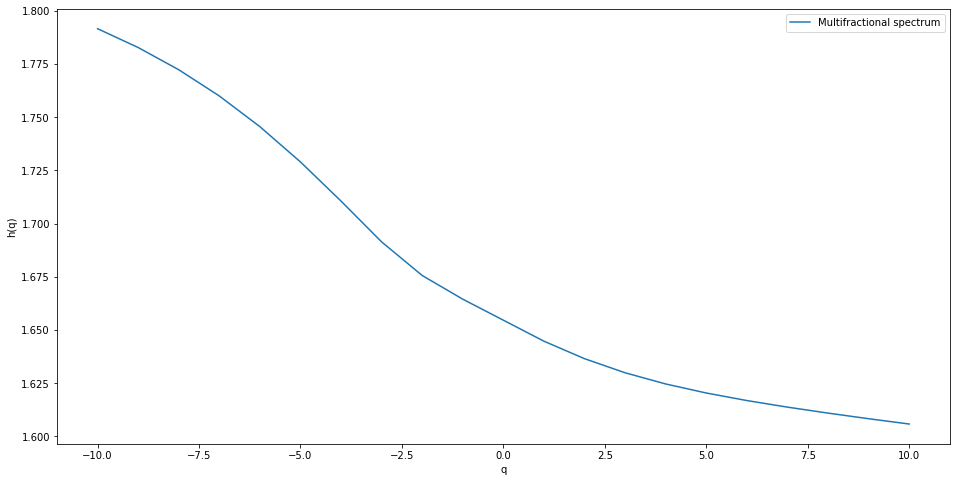

tau:  [-18.915432387369755, -17.044351913938975, -15.178137710984938, -13.319608557061985, -11.473097099003661, -9.644740229765858, -7.842163089580624, -6.074137727014076, -4.351172953514194, -2.6644522988563786, 0.6447130376483876, 2.2729856395816057, 3.889636089377353, 5.498473728303865, 7.10185029498842, 8.700947532215702, 10.296132273365174, 11.887385029099145, 13.474632669985084, 15.05789226722931]


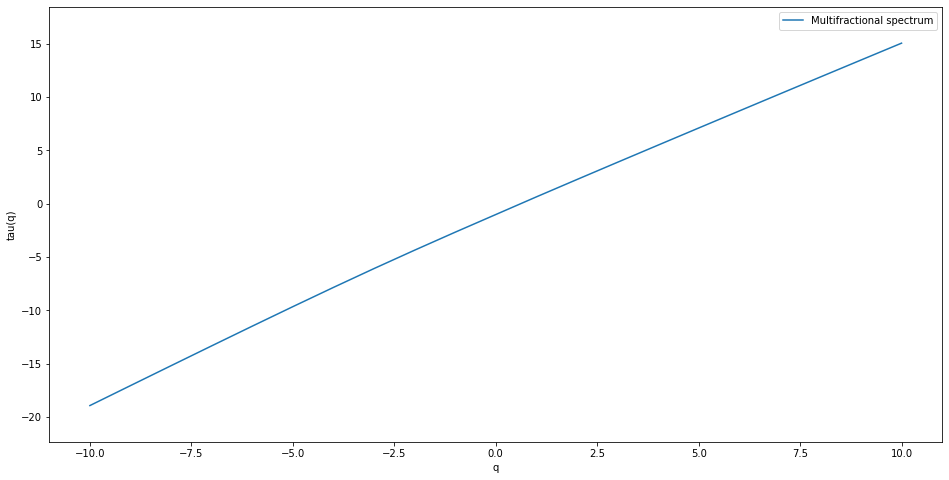

In [92]:
def get_qs_and_hqs(q_list, q_slopes):
    qs = []
    hqs = []
    for i in range(len(q_list)):
        if np.isnan(q_slopes)[i] == False:
            qs.append(q_list[i])
            hqs.append(q_slopes[i])
    return qs, hqs

qs, hqs = get_qs_and_hqs(q_list, q_slopes)
print(qs, hqs)

plt.plot(qs, hqs)
labels = ["Multifractional spectrum"]
plt.legend(labels)
plt.xlabel("q")
plt.ylabel("h(q)")
plt.show()

tau = [a*b for a,b in zip(qs, hqs)]
tau = [x-1 for x in tau]
print("tau: ", tau)
diff = np.max(tau) - np.min(tau)
plt.ylim(np.min(tau) - 0.1 * diff, np.max(tau) + 0.1 * diff)
plt.plot(qs, tau)
labels = ["Multifractional spectrum"]
plt.legend(labels)
plt.xlabel("q")
plt.ylabel("tau(q)")
plt.show()

In [95]:
def deriv(q, tau, i):
    return ((tau[i+1] - tau[i]) / (q[i+1] - q[i]))

In [96]:
alphas = []
for i in range(len(qs) -1):
    alphas.append(deriv(qs, tau, i))

[1.5832595972442256, 1.5872476408859395, 1.5912527557339704, 1.5951847411494722, 1.5990972372272818, 1.6033765666845552, 1.608837638926512, 1.6166504497957472, 1.628272601933218, 1.6545826682523832, 1.6867206546578153, 1.722964773499882, 1.768025362566548, 1.8025771401852344, 1.828356869237803, 1.8465114580583233, 1.8585291539229534, 1.866214202954037, 1.87108047343078]
[0.7747037052129464, 0.8105960979883715, 0.8426370167726187, 0.8701609146811311, 0.8936358911479889, 0.9150325384343558, 0.936876827402183, 0.9603152600098888, 0.9835595642848305, 1.0098696306039954, 0.9777316441985633, 0.9052434065144297, 0.7700616393144317, 0.6318545288396855, 0.5029558835768437, 0.39402835065372166, 0.30990447960131107, 0.24842408735264243, 0.20462765306195507]


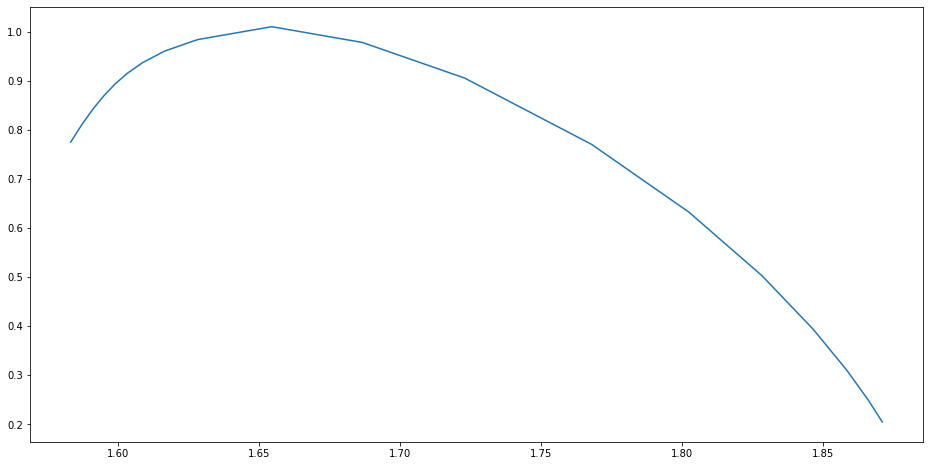

In [97]:
tmp = [x*y for x,y in zip(qs, alphas)]
f_alphas = [x -y for x,y in zip(tmp, tau)]
alphas_sorted = [x for x,_ in sorted(zip(alphas, f_alphas))]
f_alphas_sorted = [x for _,x in sorted(zip(alphas, f_alphas))]
print(alphas_sorted)
print(f_alphas_sorted)
plt.plot(alphas_sorted, f_alphas_sorted)
